# Exercises: Instability of Parameter Estimates

## Lecture Link

This exercise notebook refers to this lecture. Please use the lecture for explanations and sample code.

https://www.quantopian.com/lectures#Instability-of-Estimates

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)

In [ ]:
import requests
import json
import pandas as pd

TODAY = date.today().strftime("%Y-%m-%d")

def get_pricing(ticker, field='all', start_date='2008-01-01', end_date=TODAY):     
    params = { 
        'access_key': 'pk_7cee023fd7874b4b893b2194cc61a972',
        'symbols': ticker,
        'date_from': start_date,
        'date_to': end_date,
        'limit': 1000
    }
    
    request = requests.get('https://cloud.iexapis.com/', params)


    try:
        response = request.json()
        data = response['data']
        
        df = pd.DataFrame(data)
        df.set_index('date', inplace=True)
            
        if field == 'all':        
            return df
        
        return df[field]
        
    except:
        print(response['error'])   

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.stats.stattools import jarque_bera
import quandl as ql
import marketstack as ms
from datetime import date
import pandas_datareader.data as web

# import os
# os.environ['IEX_TOKEN'] = 'pk_7cee023fd7874b4b893b2194cc61a972'

# import sys  
# sys.path.insert(0, '/Users/scottc/Documents/Personal/research_public/notebooks/utils')
# print(sys.path)

# Set a seed so we can play with the data without generating new random numbers every time
np.random.seed(123)

# Exercise 1: Sample Size vs. Standard Deviation

Using the below normal distribution with mean 100 and standard deviation 50, find the means and standard deviations of  samples of size 5, 25, 100, and 500.

In [8]:
POPULATION_MU = 100
POPULATION_SIGMA = 25
sample_sizes = [5, 25, 100, 500]

#Your code goes here
dist = np.random.normal(100, 50, 500)

print('sample size of 5')
print('mean:', np.mean(dist[:5]))
print('standard deviation:', np.std(dist[:5]))

print('sample size of 25')
print('mean:', np.mean(dist[:25]))
print('standard deviation:', np.std(dist[:25]))

print('sample size of 100')
print('mean:', np.mean(dist[:100]))
print('standard deviation:', np.std(dist[:100]))

print('sample size of 500')
print('mean:', np.mean(dist[:500]))
print('standard deviation:', np.std(dist[:500]))

print('As sample size increases, the mean and standard deviation approach those of the population. However, even at the 500 sample level the sample mean is not the same as the population mean.')

sample size of 5
mean: 84.90780397851248
standard deviation: 54.13660413796328
sample size of 25
mean: 88.54023112211536
standard deviation: 41.094283664341596
sample size of 100
mean: 94.69551491647579
standard deviation: 48.633464591377084
sample size of 500
mean: 97.52503316239564
standard deviation: 49.84308115486865
As sample size increases, the mean and standard deviation approach those of the population. However, even at the 500 sample level the sample mean is not the same as the population mean.


# Exercise 2: Instability of Predictions on Mean Alone

## a. Finding Means

Find the means of the following three data sets $X$, $Y$, and $Z$.

In [10]:
X = [ 31.,   6.,  21.,  32.,  41.,   4.,  48.,  38.,  43.,  36.,  50., 20.,  46.,  33.,   8.,  27.,  17.,  44.,  16.,  39.,   3.,  37.,
        35.,  13.,  49.,   2.,  18.,  42.,  22.,  25.,  15.,  24.,  11., 19.,   5.,  40.,  12.,  10.,   1.,  45.,  26.,  29.,   7.,  30.,
        14.,  23.,  28.,   0.,  34.,   9.,  47.]
Y = [ 15.,  41.,  33.,  29.,   3.,  28.,  28.,   8.,  15.,  22.,  39., 38.,  22.,  10.,  39.,  40.,  24.,  15.,  21.,  25.,  17.,  33.,
        40.,  32.,  42.,   5.,  39.,   8.,  15.,  25.,  37.,  33.,  14., 25.,   1.,  31.,  45.,   5.,   6.,  19.,  13.,  39.,  18.,  49.,
        13.,  38.,   8.,  25.,  32.,  40.,  17.]
Z = [ 38.,  23.,  16.,  35.,  48.,  18.,  48.,  38.,  24.,  27.,  24., 35.,  37.,  28.,  11.,  12.,  31.,  -1.,   9.,  19.,  20.,   0.,
        23.,  33.,  34.,  24.,  14.,  28.,  12.,  25.,  53.,  19.,  42., 21.,  15.,  36.,  47.,  20.,  26.,  41.,  33.,  50.,  26.,  22.,
        -1.,  35.,  10.,  25.,  23.,  24.,   6.]

#Your code goes here
for a in [X, Y, Z]:
    print('mean', np.mean(a))

mean 25.0
mean 24.686274509803923
mean 25.607843137254903


## b. Checking for Normality

Use the `jarque_bera` function to conduct a Jarque-Bera test on $X$, $Y$, and $Z$ to determine whether their distributions are normal. 

In [15]:
#Your code goes here
for a in [X, Y, Z]:
    _, p_value, _, _ = jarque_bera(a)
    
    if p_value < 0.05:
        print('Distribution is likely normal')
        print('p-value = ', p_value)
        print('')
    else:
        print('Distribution is likely not normal')
        print('p-value = ', p_value)
        print('')

Distribution is likely not normal
p-value =  0.21602637949153217

Distribution is likely not normal
p-value =  0.25028131217047933

Distribution is likely not normal
p-value =  0.8669070017626075



## c. Instability of Estimates

Create a histogram of the sample distributions of $X$, $Y$, and $Z$ along with the best estimate/mean based on the sample.

All three datasets have a similar mean, but have very different distributions. Mean alone is very non-informative about what is going on in data, and should not be used alone as an estimator.


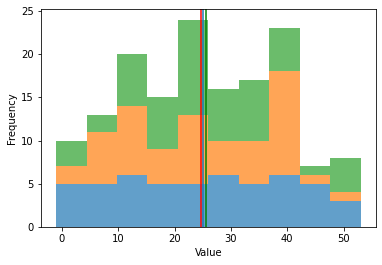

In [29]:
#Your code goes here
plt.hist([X, Y, Z], stacked=True, alpha = 0.7)

plt.axvline(np.mean(X));
plt.axvline(np.mean(Y), c='r');
plt.axvline(np.mean(Z), c='g');

plt.ylabel('Frequency')
plt.xlabel('Value');

print('All three datasets have a similar mean, but have very different distributions. Mean alone is very non-informative about what is going on in data, and should not be used alone as an estimator.')

# Exercise 3: Sharpe Ratio Window Adjustment

## a. Effect on Variability

Just as in the lecture, find the mean and standard deviation of the running sharpe ratio for THO, this time testing for multiple window lengths: 300, 150, and 50. Restrict your mean and standard deviation calculation to pricing data up to 200 days away from the end.

In [246]:
def sharpe_ratio(asset, riskfree):
    return np.mean(asset - riskfree)/np.std(asset - riskfree)

import quandl as ql

import pyEX as p
import pandas_datareader.data as web
from datetime import date

start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2015, 1, 1)
# end = date.today().strftime("%Y-%m-%d")

THO = web.DataReader('THO', 'iex', start=start, end=end, api_key=os.getenv('IEX_API_KEY'))
THO.index = pd.to_datetime(THO.index)
THO = THO['close'].pct_change()[1:]

TBILL_3_Month = ql.get('USTREASURY/BILLRATES', start_date=start, end_date=end)
TBILL_3_Month = TBILL_3_Month['13 Wk Bank Discount Rate'].pct_change()[1:]

for window in [50, 150, 300]:
    running_sharpe = [sharpe_ratio(THO[i-window+10:i], TBILL_3_Month[i-window+10:i]) for i in range(window-10, len(THO))]
    running_sharpe = [x for x in running_sharpe if str(x) != 'nan']

    mean_rs = np.mean(running_sharpe[:-200])
    std_rs = np.std(running_sharpe[:-200])
    
    row = 'Sharpe Mean',(window),':', mean_rs,'Std', window,':',std_rs
    print('{} {:>3}{} {:<11f}    {:>5} {:>3}{} {}'.format(*row))
    
print('As we increase the length of the window, the variability of the running sharpe ratio decreases.')

Sharpe Mean  50: -0.063775        Std  50: 0.10852786550185405
Sharpe Mean 150: -0.051049        Std 150: 0.04837802621082556
Sharpe Mean 300: -0.042091        Std 300: 0.03228526010407838
As we increase the length of the window, the variability of the running sharpe ratio decreases.


## b. Out-of-Sample Instability

Plot the running sharpe ratio of all three window lengths, as well as their in-sample mean and standard deviation bars.

In [142]:
#Your code goes here

                         0  DTB3
date                            
2019-03-18           63.87   NaN
2019-03-19           62.96   NaN
2019-03-20           60.34   NaN
2019-03-21           61.49   NaN
2019-03-22           57.86   NaN
...                    ...   ...
2021-03-10 00:00:00    NaN  0.04
2021-03-11 00:00:00    NaN  0.04
2021-03-12 00:00:00    NaN  0.04
2021-03-15 00:00:00    NaN  0.04
2021-03-16 00:00:00    NaN  0.02

[1026 rows x 2 columns]


# Exercise 4: Weather

## a. Temperature in Boston

Find the mean and standard deviation of Boston weekly average temperature data for the year of 2015 stored in `b15_df`. 

In [248]:
b15_df = pd.DataFrame([ 29.,  22.,  19.,  17.,  19.,  19.,  15.,  16.,  18.,  25.,  21.,
        25.,  29.,  27.,  36.,  38.,  40.,  44.,  49.,  50.,  58.,  61.,
        67.,  69.,  74.,  72.,  76.,  81.,  81.,  80.,  83.,  82.,  80.,
        79.,  79.,  80.,  74.,  72.,  68.,  68.,  65.,  61.,  57.,  50.,
        46.,  42.,  41.,  35.,  30.,  27.,  28.,  28.],
        columns = ['Weekly Avg Temp'],
        index = pd.date_range('1/1/2012', periods=52, freq='W')          )

#Your code goes here
mean_b15_df = np.mean(b15_df)
std_b15_df = np.std(b15_df)

print(mean_b15_df)
print(std_b15_df)

Weekly Avg Temp    49.076923
dtype: float64
Weekly Avg Temp    22.983979
dtype: float64


## b. Temperature in Palo Alto

Find the mean and standard deviation of Palo Alto weekly average temperature data for the year of 2015 stored in `p15_df`.

In [250]:
p15_df = pd.DataFrame([ 49.,  53.,  51.,  47.,  50.,  46.,  49.,  51.,  49.,  45.,  52.,
        54.,  54.,  55.,  55.,  57.,  56.,  56.,  57.,  63.,  63.,  65.,
        65.,  69.,  67.,  70.,  67.,  67.,  68.,  68.,  70.,  72.,  72.,
        70.,  72.,  70.,  66.,  66.,  68.,  68.,  65.,  66.,  62.,  61.,
        63.,  57.,  55.,  55.,  55.,  55.,  55.,  48.],
        columns = ['Weekly Avg Temp'],
        index = pd.date_range('1/1/2012', periods=52, freq='W'))

#Your code goes here
mean_p15_df = np.mean(p15_df)
std_p15_df = np.std(p15_df)

print(mean_p15_df)
print(std_p15_df)

Weekly Avg Temp    59.788462
dtype: float64
Weekly Avg Temp    7.974325
dtype: float64


## c. Predicting 2016 Temperatures

Use the means you found in parts a and b to attempt to predict  2016 temperature data for both cities. Do this by creating two histograms for the 2016 temperature data in `b16_df` and `p16_df` with a vertical line where the 2015 means were to represent your prediction.

In [ ]:
b16_df = pd.DataFrame([ 26.,  22.,  20.,  19.,  18.,  19.,  17.,  17.,  19.,  20.,  23., 22.,  28.,  28.,  35.,  38.,  42.,  47.,  49.,  56.,  59.,  61.,
        61.,  70.,  73.,  73.,  73.,  77.,  78.,  82.,  80.,  80.,  81., 78.,  82.,  78.,  76.,  71.,  69.,  66.,  60.,  63.,  56.,  50.,
        44.,  43.,  34.,  33.,  31.,  28.,  27.,  20.],
        columns = ['Weekly Avg Temp'],
        index = pd.date_range('1/1/2012', periods=52, freq='W'))

p16_df = pd.DataFrame([ 50.,  50.,  51.,  48.,  48.,  49.,  50.,  45.,  52.,  50.,  51., 52.,  50.,  56.,  58.,  55.,  61.,  56.,  61.,  62.,  62.,  64.,
        64.,  69.,  71.,  66.,  69.,  70.,  68.,  71.,  70.,  69.,  72., 71.,  66.,  69.,  70.,  70.,  66.,  67.,  64.,  64.,  65.,  61.,
        61.,  59.,  56.,  53.,  55.,  52.,  52.,  51.],
        columns = ['Weekly Avg Temp'],
        index = pd.date_range('1/1/2012', periods=52, freq='W'))

#Your code goes here


---

Congratulations on completing the instability of parameter estimates exercises!

As you learn more about writing trading models and the Quantopian platform, enter a daily [Quantopian Contest](https://www.quantopian.com/contest). Your strategy will be evaluated for a cash prize every day.

Start by going through the [Writing a Contest Algorithm](https://www.quantopian.com/tutorials/contest) tutorial.

date*This presentation is for informational purposes only and does not constitute an offer to sell, a solic
itation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*